<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_13_Matplotlib Format Charts.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## 🟩 Subplots with Bar Charts (2.13.1)

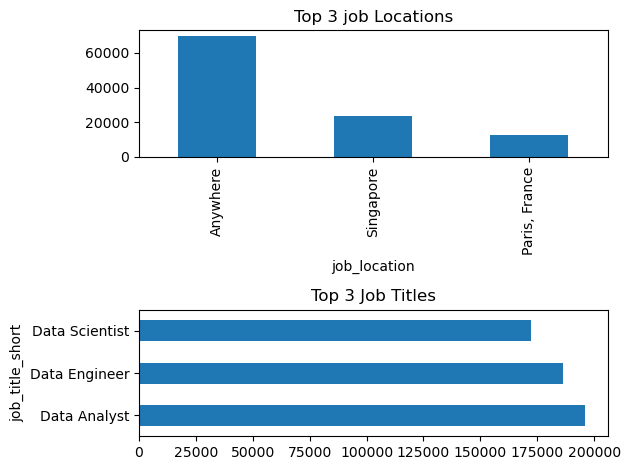

In [ ]:
fig, ax = plt.subplots(2,1)

job_locations = df['job_location'].value_counts().head(3).plot(kind='bar', ax=ax[0])
job_locations.set_title('Top 3 job Locations')


job_titles = df['job_title_short'].value_counts().head(3).plot(kind='barh', ax=ax[1])
job_titles.set_title('Top 3 Job Titles')
job_titles

fig.tight_layout()


---

## 🟨 Subplots with Job Titles by Schedule (2.13.2)

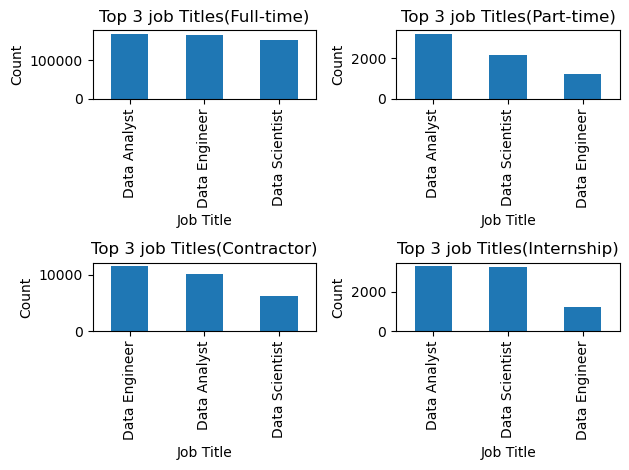

In [4]:
fig, ax = plt.subplots(2, 2)

# Job schedule types
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']

for i, schedule in enumerate(schedules):
    df_schedule = df[df['job_schedule_type'] == schedule]
    job_titles = df_schedule['job_title_short'].value_counts().head(3)
    job_titles.plot(kind='bar', ax=ax[i//2,i%2],title=f'Top 3 job Titles({schedule})')
     # Add axis labels
    ax[i//2, i%2].set_xlabel('Job Title')
    ax[i//2, i%2].set_ylabel('Count')

fig.tight_layout()
plt.show()








---

## 🟥 Top Skills for Job Roles Subplots (2.13.3)

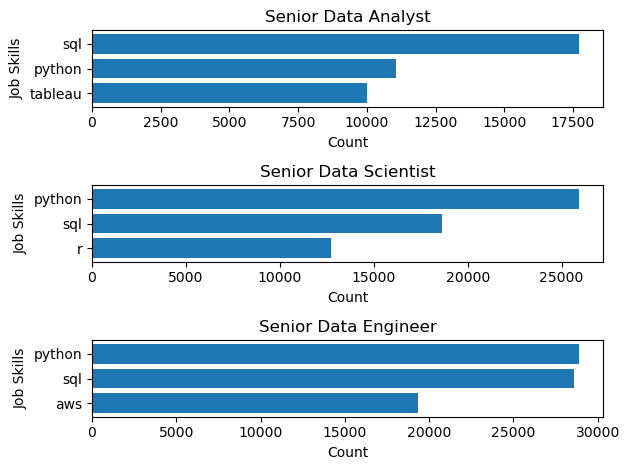

In [ ]:
df_skills = df.explode('job_skills')

job_roles = ['Senior Data Analyst', 'Senior Data Scientist', 'Senior Data Engineer']

fig, ax = plt.subplots(len(job_roles), 1)

for i, role in enumerate(job_roles):
    role_skills = df_skills[df_skills['job_title_short'] == role]['job_skills'].value_counts().head(3)
    ax[i].barh(role_skills.index, role_skills.values)
    ax[i].set_title(role)
    ax[i].set_xlabel('Count')
    ax[i].set_ylabel('Job Skills')
    ax[i].invert_yaxis()
fig.tight_layout()
plt.show()
    




---